In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris

In [2]:
iris_data = load_iris()

In [3]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
data = iris_data["data"]
target = iris_data["target"]

In [5]:
## all features
iris_data["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
## all classes
iris_data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df = pd.DataFrame(data, columns=iris_data["feature_names"])

In [8]:
df["classes"] = target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classes
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
df.columns = df.columns.str.removesuffix("(cm)").str.strip()

In [10]:
filter = (df["classes"] == 0) | (df["classes"] == 1)
df2 = df[filter]

In [11]:
df2

,sepal length,sepal width,petal length,petal width,classes
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [12]:
data_x =  df2[["petal length", "petal width"]]
data_y =  df2["classes"] 

## Plotting the data with classes

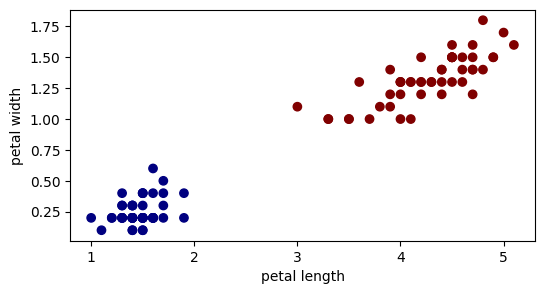

In [13]:
ig, ax = plt.subplots(figsize=(6,3))
ax.scatter(data_x["petal length"], data_x["petal width"], c=data_y, cmap='jet')

ax.set_xlabel("petal length")
ax.set_ylabel("petal width")
plt.show()

### Creating the SVC Model

In [14]:
svc_clf = SVC(kernel="linear", degree=1)
svc_clf.fit(data_x, data_y)

SVC(degree=1, kernel='linear')

In [15]:
svc_clf.coef_, svc_clf.intercept_

(array([[1.1, 0.7]]), array([-3.27999997]))

In [16]:
w = svc_clf.coef_[0]
b = svc_clf.intercept_[0]

In [17]:
## a/b, c/b
## y = mx +c 
## m = w[0]/w[1]
## c = c/w[1]

x0 = np.linspace(0,6.0,100)
y = -(w[0]/w[1])*x0 - b/w[1]

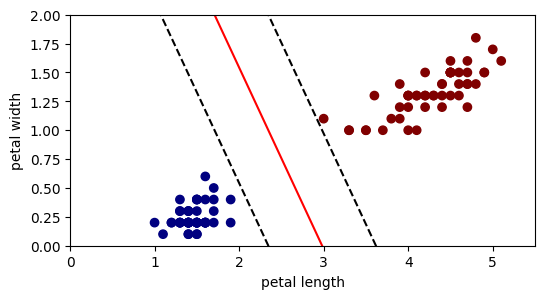

In [18]:
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(data_x["petal length"], data_x["petal width"], c=data_y, cmap='jet')

ax.plot(x0,y, color='red')
ax.plot(x0,y+1, "k--")
ax.plot(x0,y-1, "k--")
ax.set_xlabel("petal length")
ax.set_ylabel("petal width")
ax.axis([0,5.5, 0, 2])
plt.show()

In [19]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

In [20]:
X, Y = make_blobs(centers=2, random_state=2, cluster_std = 1.2)

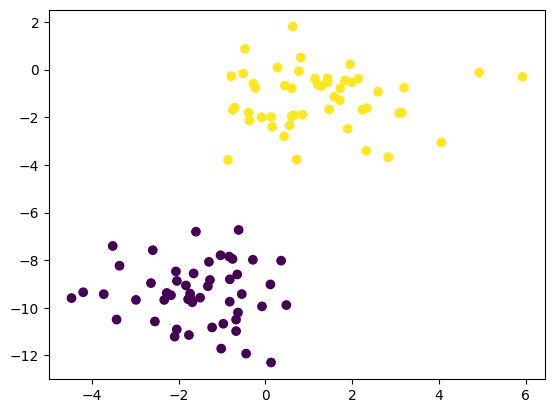

In [21]:
plt.scatter(X[:,0], X[:,1], c=Y)

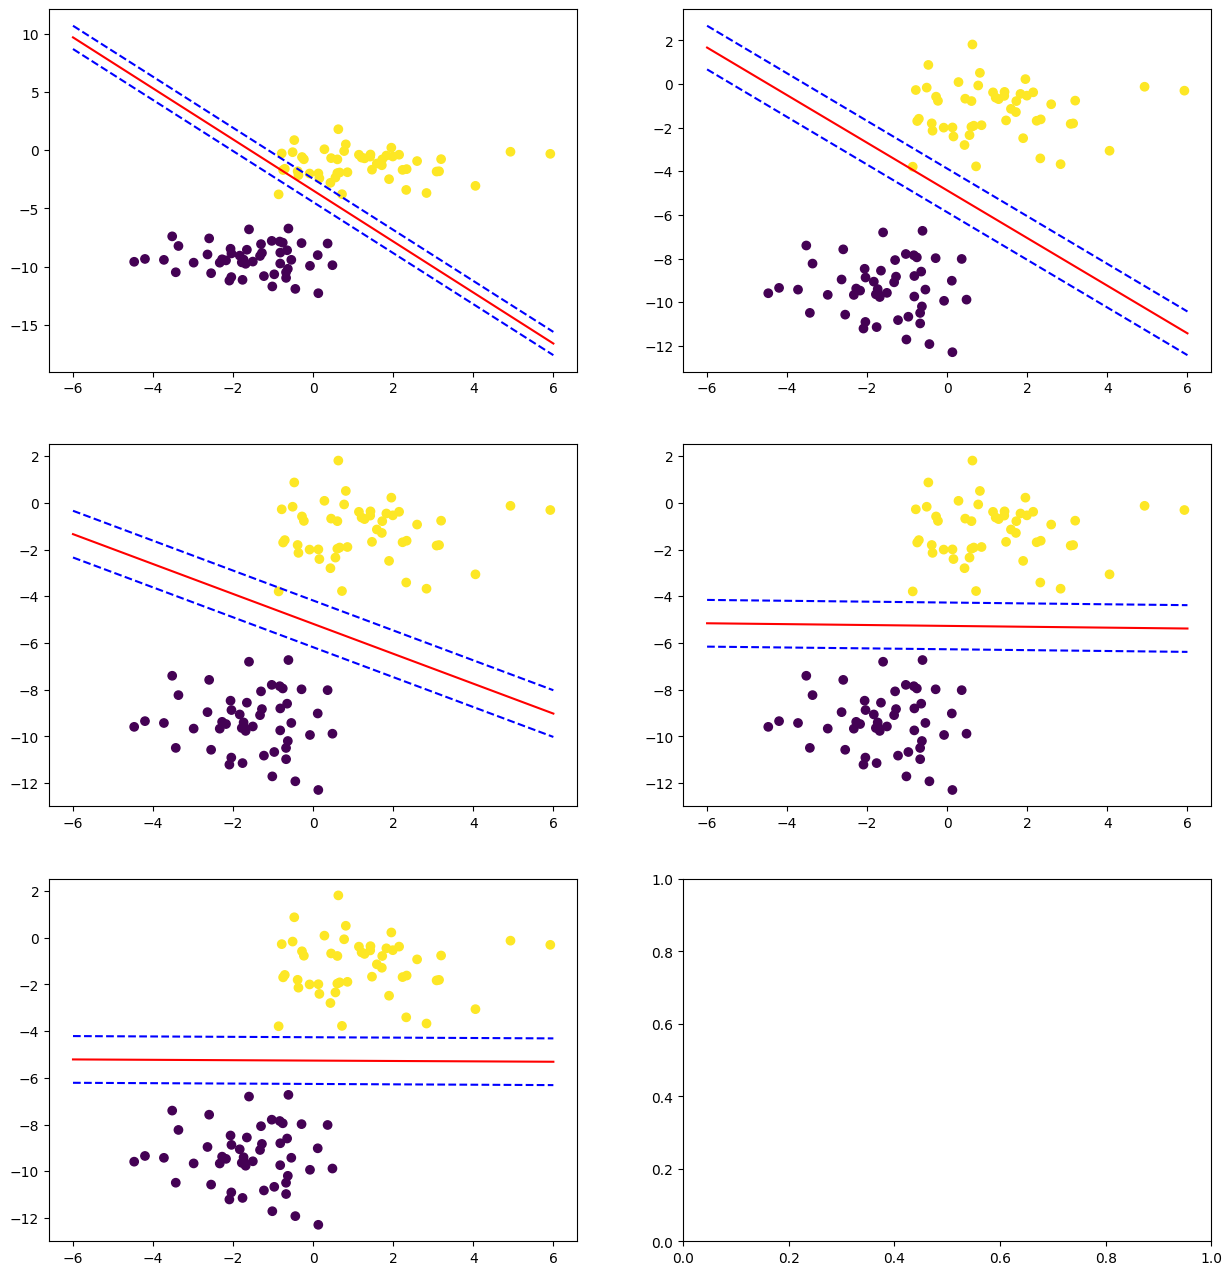

In [22]:
fig , axes = plt.subplots(3,2, figsize=(15, 8*2))

C = [0.01, 0.1, 1, 50, 100]

for ax, c_ in zip(axes.flat, C):
    clf = LinearSVC(dual=False, C= c_)
    clf.fit(X,Y)

    W = clf.coef_[0]
    B = clf.intercept_[0]
    x0 = np.linspace(-6,6,100)
    y = -(W[0]*x0 + B)/W[1]

    ax.scatter(X[:,0], X[:,1], c=Y)
    ax.plot(x0, y, color="red")
    ax.plot(x0, y+1, "b--")
    ax.plot(x0, y-1, "b--")

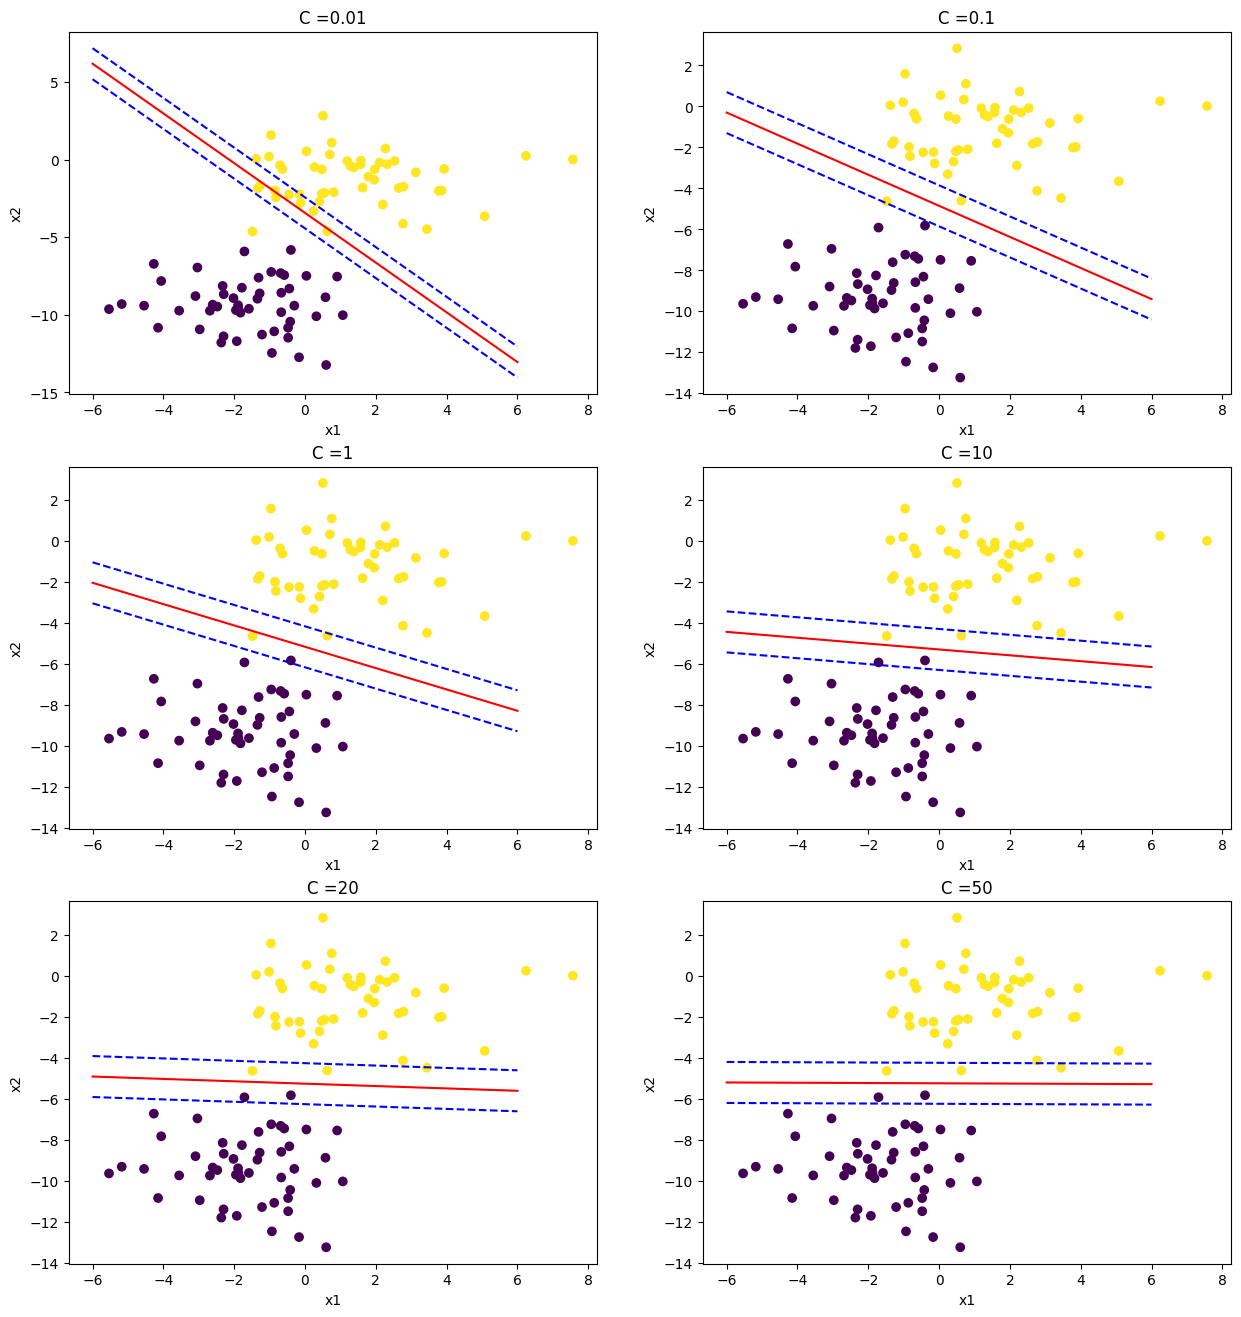

In [29]:
X, Y = make_blobs(centers=2, random_state=2, cluster_std = 1.6)

fig, axes = plt.subplots(3,2, figsize=(15,8*2))

c = [0.01, 0.1, 1, 10, 20, 50]

for ax, c_ in zip(axes.flat, c):
    clf = LinearSVC(dual=False, C=c_)
    clf.fit(X,Y)

    W = clf.coef_[0]
    B = clf.intercept_[0]
    x0 = np.linspace(-6,6,100)
    y = -(W[0]*x0 + B)/W[1]

    ax.scatter(X[:,0], X[:,1], c=Y)
    ## decision line
    ax.plot(x0, y, color="red")

    ## margin line
    ax.plot(x0, y+1, "b--")
    ax.plot(x0, y-1, "b--")

    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_title(f"C ={c_}")

plt.show()

## Decision Regions Cluster

In [30]:
from sklearn.inspection import DecisionBoundaryDisplay

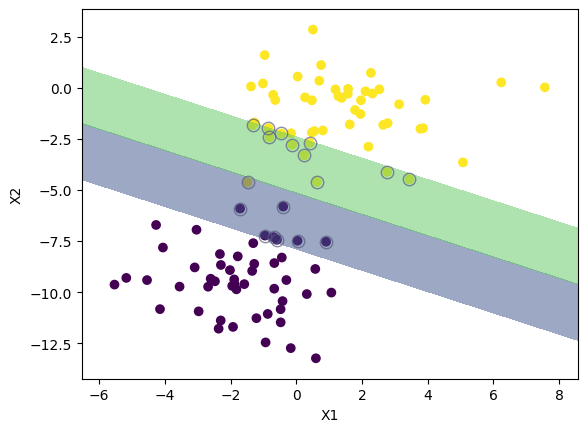

In [39]:
X, Y = make_blobs(centers=2, random_state=2, cluster_std=1.6)

clf = LinearSVC(dual=False, C=1)
clf.fit(X, Y)

z = clf.decision_function(X)

W = clf.coef_[0]
B = clf.intercept_[0]
x0 = np.linspace(-6,6,100)
y = -(W[0]*x0 + B)/w[1]

ax = plt.gca()
ax.scatter(X[:,0], X[:,1], c=Y)

disp = DecisionBoundaryDisplay.from_estimator(clf, X, ax=ax, response_method="decision_function", levels=[-1,0,1], xlabel="X1", ylabel="X2", alpha=0.5)

## identify the support vectors
support_vector_index = np.abs(clf.decision_function(X)) <=1+1e-15
support_vectors = X[support_vector_index]
ax.scatter(support_vectors[:,0], support_vectors[:,1], color="#0000", edgecolor='#55577Caa', s=80)